In [ ]:
!pip install nltk

  Using cached nltk-3.5.zip (1.4 MB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached regex-2020.11.13-cp38-cp38-win_amd64.whl (270 kB)
  Using cached tqdm-4.59.0-py2.py3-none-any.whl (74 kB)
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=9204e57ad04c5cc4a8dd4c8100fa61000adc3296995a299dfec30b6f4a3035ee
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


In [11]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [49]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # for lemmatization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
from keras.utils.vis_utils import plot_model

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


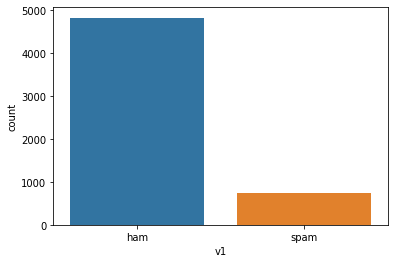

In [ ]:
sns.countplot(df['v1'])
plt.show()

In [ ]:
len(df)

5572

In [ ]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

## Lemmatization

In [4]:
lemmatizer = WordNetLemmatizer()

In [8]:
lem = []

for msg in range(len(df)):
    txt = re.sub('[^a-zA-Z]', ' ', df['v2'][msg])   # replace all non alphabets with ' '
    txt = txt.lower()                               # lower each sentence
    txt = txt.split()                               # split each sentence
    txt = [lemmatizer.lemmatize(word) for word in txt if word not in stopwords.words('english')]    # remove stopwords and lemmatize
    txt = ' '.join(txt)                             # join back all list of words into a sentence
    lem.append(txt)                                 # adding sentences to a list

In [ ]:
lem[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [9]:
df['message'] = lem
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,message
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,nah think go usf life around though


## Classification: Bag of Words

In [ ]:
cv = CountVectorizer(max_features = 3000)
X = cv.fit_transform(lem).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# dummies for v1

y = pd.get_dummies(df['v1'])
y.head()

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [ ]:
# taking only the spam column

y = y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
print(X.shape, y.shape)

(5572, 3000) (5572,)


In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(4457, 3000) (4457,) (1115, 3000) (1115,)


### Naive Bayes

In [ ]:
# training using Naive Bayes

modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
y_pred = modelNB.predict(X_test)

In [ ]:
from IPython.display import HTML, display
import tabulate
print('CONFUSION MATRIX in SkLearn:')
print('0: Negative/Ham, 1: Positive/Spam')
print()
table = [['','Predicted 0','Predicted 1'],
         ['Actual 0','TN','FP'],
         ['Actual 1','FN','TP']]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

CONFUSION MATRIX in SkLearn:
0: Negative/Ham, 1: Positive/Spam



,Predicted 0,Predicted 1
Actual 0,TN,FP
Actual 1,FN,TP


In [ ]:
confusion_matrix(y_test, y_pred)

array([[948,  17],
       [  7, 143]])

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * (Recall * Precision) / (Recall + Precision)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       965
           1       0.89      0.95      0.92       150

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
print(round(accuracy_score(y_test, y_pred),2))

0.98


In [ ]:
print(round(f1_score(y_test, y_pred),2))

0.92


In [ ]:
print(round(precision_score(y_test, y_pred),2))

0.89


In [ ]:
print(round(recall_score(y_test, y_pred),2))

0.95


Above 3 results are when class = 1.

In [ ]:
modelNB.get_params

<bound method BaseEstimator.get_params of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>

In [ ]:
cross_val_score(modelNB, X, y, cv=5, scoring = 'accuracy')

array([0.97757848, 0.98744395, 0.98294434, 0.98294434, 0.97935368])

### KNeighborsClassifier

In [ ]:
modelKN = KNeighborsClassifier(n_neighbors=3)
modelKN.fit(X_train, y_train)
y_pred = modelKN.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 68,  82]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       965
           1       1.00      0.55      0.71       150

    accuracy                           0.94      1115
   macro avg       0.97      0.77      0.84      1115
weighted avg       0.94      0.94      0.93      1115



### DecisionTreeClassifier

In [ ]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)
y_pred = modelDT.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[948,  17],
       [ 20, 130]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       965
           1       0.88      0.87      0.88       150

    accuracy                           0.97      1115
   macro avg       0.93      0.92      0.93      1115
weighted avg       0.97      0.97      0.97      1115



### SVM Classifier

In [ ]:
modelSV = SVC()
modelSV.fit(X_train, y_train)
y_pred = modelSV.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 26, 124]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Classification: TFIDF

In [ ]:
vec = TfidfVectorizer(max_features = 3000)
X = vec.fit_transform(lem).toarray()

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

### Naive Bayes

In [ ]:
# training using Naive Bayes

modelNB = MultinomialNB()
modelNB.fit(X_train, y_train)
y_pred = modelNB.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[962,   3],
       [ 23, 127]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



### KNeighborsClassifier

In [ ]:
modelKN = KNeighborsClassifier(n_neighbors=3)
modelKN.fit(X_train, y_train)
y_pred = modelKN.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 78,  72]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       965
           1       1.00      0.48      0.65       150

    accuracy                           0.93      1115
   macro avg       0.96      0.74      0.80      1115
weighted avg       0.94      0.93      0.92      1115



### DecisionTreeClassifier

In [ ]:
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)
y_pred = modelDT.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[943,  22],
       [ 27, 123]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       965
           1       0.85      0.82      0.83       150

    accuracy                           0.96      1115
   macro avg       0.91      0.90      0.90      1115
weighted avg       0.96      0.96      0.96      1115



### SVM Classifier

In [ ]:
modelSV = SVC()
modelSV.fit(X_train, y_train)
y_pred = modelSV.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[965,   0],
       [ 21, 129]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.86      0.92       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## Spam messages Word Cloud

In [10]:
df_new = df[['v1','message']]
df_new.head()

,v1,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [ ]:
df_spam = df_new[df_new['v1']=='spam']

In [ ]:
corpus = ''

for msg in df_spam['message']:
    msg = str(msg)
    msg = msg.split()                               # split each sentence
    corpus += ' '.join(msg)+' '

In [ ]:
corpus

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv winner valued network customer selected receivea prize reward claim call claim code kl valid hour mobile month u r entitled update latest colour mobile camera free call mobile update co free six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw xxxmobilemovieclub use credit click wap link next txt message click http wap xxxmobilemovieclub com n qjkgighjjgcbl england v macedonia dont miss goal team news txt ur national team eg england try wale scotland txt poboxox w wq thanks subscription ringtone uk mobile charged month please confirm replying yes reply charged rodger burn msg tried call reply sm free nokia mobile free camcorder please call delivery tomorrow sm ac sptv new jersey devil det

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(corpus)

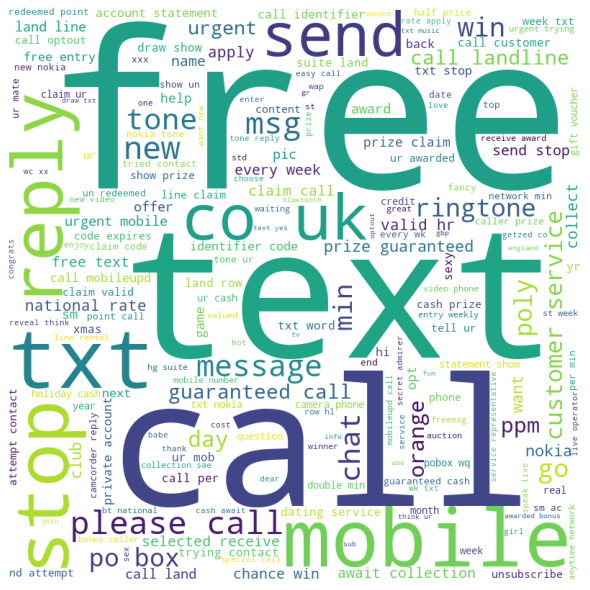

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Ham messages Word Cloud

In [ ]:
df_ham = df_new[df_new['v1']=='ham']

In [ ]:
corpus = ''

for msg in df_ham['message']:
    msg = str(msg)
    msg = msg.split()                               # split each sentence
    corpus += ' '.join(msg)+' '

In [ ]:
corpus

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune gonna home soon want talk stuff anymore tonight k cried enough today searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh k watching eh u remember spell name yes v naughty make v wet fine way u feel way gota b seriously spell name going try month ha ha joking pay first lar da stock comin aft finish lunch go str lor ard smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho suck mark getting worried know sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left dinner feel love back amp packing car let know room

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(corpus)

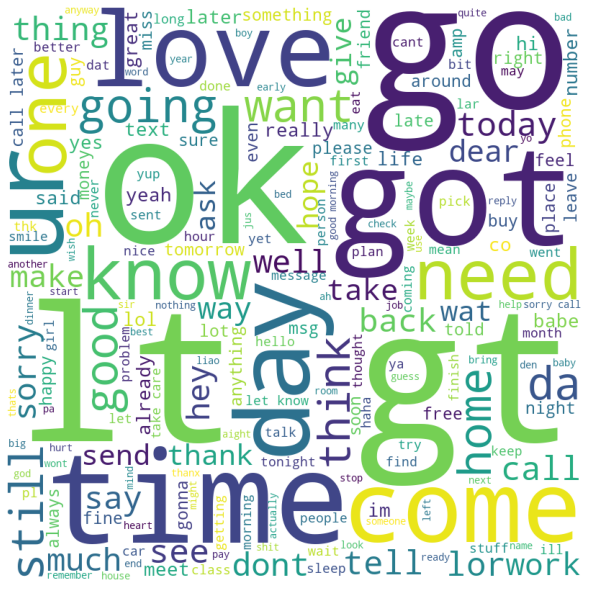

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Final Model using SVM

In [ ]:
vec = TfidfVectorizer()

In [ ]:
df_new.head()

,v1,message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [ ]:
X = df_new['message'].values
y = df_new['v1'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [ ]:
X_train = vec.fit_transform(X_train)

In [ ]:
modelSV = SVC()
modelSV.fit(X_train, y_train)
X_test = vec.transform(X_test)
y_pred = modelSV.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[964,   1],
       [ 21, 129]])

In [ ]:
msgInput = 'claim your free rewards'
print('Entered message: ', msgInput)
msgInput = vec.transform([msgInput])
predict = modelSV.predict(msgInput)
if(predict[0]=='spam'):
  print("------------------------MESSAGE-IS-SPAM---------------------------")
else:
  print("------------------------MESSAGE-IS-HAM-----------------------------")

Entered message:  claim your free rewards
------------------------MESSAGE-IS-SPAM---------------------------


In [ ]:
msgInput = 'hey how are you'
print('Entered message: ', msgInput)
msgInput = vec.transform([msgInput])
predict = modelSV.predict(msgInput)
if(predict[0]=='spam'):
  print("------------------------MESSAGE-IS-SPAM---------------------------")
else:
  print("------------------------MESSAGE-IS-HAM-----------------------------")

Entered message:  hey how are you
------------------------MESSAGE-IS-HAM-----------------------------


## Deep Learning

In [12]:
# map ham as 0 and spam as 1

df_new['type']= df_new['v1'].map({'ham': 0, 'spam': 1})
msg_type = df_new['type'].values

In [13]:
df_new.head()

,v1,message,type
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry wkly comp win fa cup final tkts st ...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah think go usf life around though,0


In [14]:
msg_type

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(df_new['message'], msg_type, test_size=0.2, random_state=10)

In [18]:
# Defining pre-processing hyperparameters
max_len = 50                # going to use 50 words in a sentence
trunc_type = "post"         # if sequence length is > than maxlen then, these values will be truncated to maxlen at the end of sequences
padding_type = "post"       # by using post padding, we pad after each sequence
oov_tok = "<OOV>"           # it will be added to word_index and used to replace out-of-vocab words during text_to_sequence calls
vocab_size = 500            # num of unique words to load in training and testing data

In [21]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)      # tokenizing at word level and not character level
tokenizer.fit_on_texts(X_train)                                                           # updates internal vocabulary based on a list of texts

In [29]:
# get the word_index

word_index = tokenizer.word_index

dict(list(word_index.items())[:10])      # showing first 10 indexed items

{'<OOV>': 1,
 'call': 3,
 'day': 10,
 'get': 4,
 'go': 6,
 'gt': 7,
 'lt': 8,
 'ok': 9,
 'u': 2,
 'ur': 5}

In [30]:
# check how many words

tot_words = len(word_index)
print('%s unique tokens in training data' % tot_words)

6329 unique tokens in training data


After tokenization, each sentence is represented by sequences of numbers using texts_to_sequences() from tokenizer object. Then pad_sequences() is used so that each sequence will have same length.

In [34]:
# sequencing and padding on training and testing 

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [42]:
X_train[0:5]

5281                                             princess
1300    cocksucker make feel better ipads worthless ga...
5128                                     wot wed nite til
1808    aiyo bit pai seh noe scared dun rem die hee be...
856                                       going take babe
Name: message, dtype: object

In [36]:
training_sequences[0:5]

[[299],
 [1, 58, 109, 212, 1, 1, 1, 1, 1, 109, 273, 129, 1, 22],
 [383, 1, 285, 333],
 [1, 195, 1, 1, 462, 1, 135, 1, 1, 1, 1, 212, 1, 1, 286],
 [25, 34, 88]]

In [37]:
training_padded[0:5]

array([[299,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,  58, 109, 212,   1,   1,   1,   1,   1, 109, 273, 129,   1,
         22,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [383,   1, 285, 333,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 195,   1,   1, 462,   1, 135,   1,   1,   1,   1, 212,   1,
          1, 286,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
     

In [43]:
X_train.shape

(4457,)

In [44]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (4457, 50)
Shape of testing tensor:  (1115, 50)


In [45]:
# before padding length of first 2

len(training_sequences[0]), len(training_sequences[1])

(1, 14)

In [46]:
# after padding

len(training_padded[0]), len(training_padded[1])

(50, 50)

### Using Dense Network

In [47]:
vocab_size = 500              # as defined earlier
embeding_dim = 16             # size of the N-dimensional vector
drop_value = 0.2              # dropout
n_dense = 24

In [50]:
# dense model architecture

model = Sequential()                                                      # layers added sequentially
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))      # embedding layer maps each word to a N-dimensional vector of real numbers
model.add(GlobalAveragePooling1D())                 # pooling layer helps to reduce the number of parameters (helps to avoid overfitting)
                                                    # used average pooling here and converted layer to 1 dimension.
model.add(Dense(n_dense, activation='relu'))             # dense layer with activation function ‘relu’
model.add(Dropout(drop_value))                      # dropout layer to avoid overfitting
model.add(Dense(1, activation='sigmoid'))           # final output layer with sigmoid activation function with single output neuron
                                                    # sigmoid activation function outputs probabilities between 0 and 1

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


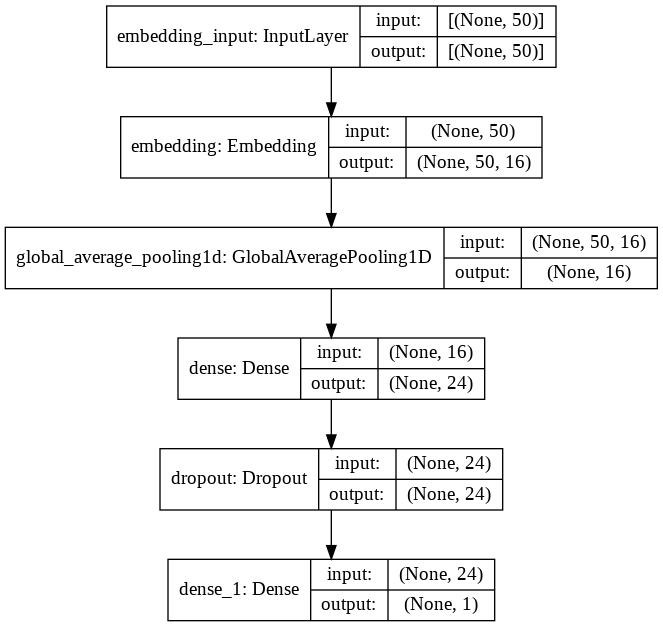

In [52]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
# fitting a dense spam detector model

num_epochs = 50
history = model.fit(training_padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test), verbose=2)

Epoch 1/50
140/140 - 4s - loss: 0.5205 - accuracy: 0.8503 - val_loss: 0.3684 - val_accuracy: 0.8655
Epoch 2/50
140/140 - 0s - loss: 0.3471 - accuracy: 0.8661 - val_loss: 0.3227 - val_accuracy: 0.8655
Epoch 3/50
140/140 - 0s - loss: 0.2951 - accuracy: 0.8676 - val_loss: 0.2546 - val_accuracy: 0.8744
Epoch 4/50
140/140 - 0s - loss: 0.2035 - accuracy: 0.9195 - val_loss: 0.1634 - val_accuracy: 0.9408
Epoch 5/50
140/140 - 0s - loss: 0.1308 - accuracy: 0.9592 - val_loss: 0.1110 - val_accuracy: 0.9614
Epoch 6/50
140/140 - 0s - loss: 0.0917 - accuracy: 0.9740 - val_loss: 0.0834 - val_accuracy: 0.9713
Epoch 7/50
140/140 - 0s - loss: 0.0737 - accuracy: 0.9803 - val_loss: 0.0708 - val_accuracy: 0.9776
Epoch 8/50
140/140 - 0s - loss: 0.0620 - accuracy: 0.9821 - val_loss: 0.0635 - val_accuracy: 0.9812
Epoch 9/50
140/140 - 0s - loss: 0.0551 - accuracy: 0.9841 - val_loss: 0.0589 - val_accuracy: 0.9794
Epoch 10/50
140/140 - 0s - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0563 - val_accuracy: 0.9812

In [55]:
# model performance on test data

model.evaluate(testing_padded, y_test)

35/35 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9839


[0.06922850757837296, 0.9838564991950989]

In [56]:
# list all data in history

print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


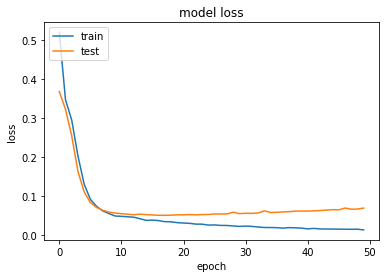

In [57]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

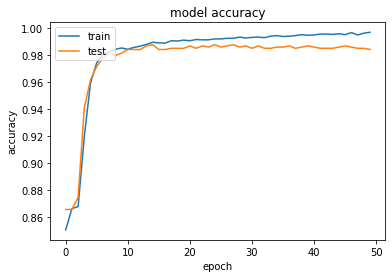

In [58]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Using LSTM

In [59]:
# LSTM hyperparameters

n_lstm = 20             # number of nodes in the hidden layers within the LSTM cell
drop_lstm =0.2          # dropout

In [60]:
# LSTM Spam detection architecture

model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))

In [61]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
lstm (LSTM)                  (None, 50, 20)            2960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
dense_2 (Dense)              (None, 50, 1)             21        
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


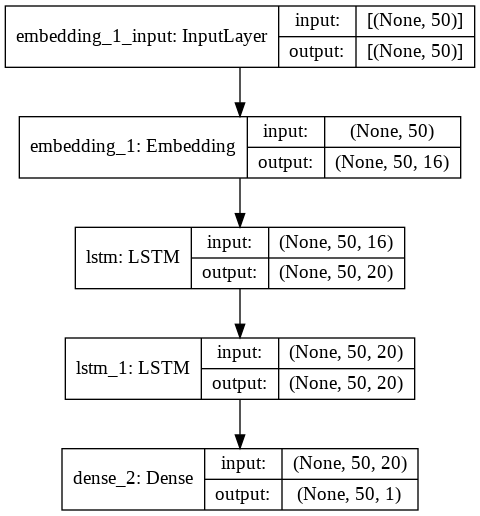

In [62]:
plot_model(model1, show_shapes=True, show_layer_names=True)

In [63]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
# fitting a dense spam detector model

num_epochs = 50
history = model1.fit(training_padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test), verbose=2)

Epoch 1/50
140/140 - 33s - loss: 0.4033 - accuracy: 0.8759 - val_loss: 0.1906 - val_accuracy: 0.9557
Epoch 2/50
140/140 - 1s - loss: 0.1420 - accuracy: 0.9642 - val_loss: 0.1309 - val_accuracy: 0.9615
Epoch 3/50
140/140 - 1s - loss: 0.1023 - accuracy: 0.9739 - val_loss: 0.1087 - val_accuracy: 0.9701
Epoch 4/50
140/140 - 1s - loss: 0.0867 - accuracy: 0.9775 - val_loss: 0.1040 - val_accuracy: 0.9719
Epoch 5/50
140/140 - 1s - loss: 0.0769 - accuracy: 0.9790 - val_loss: 0.1024 - val_accuracy: 0.9662
Epoch 6/50
140/140 - 1s - loss: 0.0695 - accuracy: 0.9805 - val_loss: 0.1043 - val_accuracy: 0.9710
Epoch 7/50
140/140 - 1s - loss: 0.0665 - accuracy: 0.9808 - val_loss: 0.1080 - val_accuracy: 0.9679
Epoch 8/50
140/140 - 1s - loss: 0.0637 - accuracy: 0.9814 - val_loss: 0.1017 - val_accuracy: 0.9726
Epoch 9/50
140/140 - 1s - loss: 0.0594 - accuracy: 0.9826 - val_loss: 0.1087 - val_accuracy: 0.9709
Epoch 10/50
140/140 - 1s - loss: 0.0548 - accuracy: 0.9841 - val_loss: 0.1049 - val_accuracy: 0.971

In [65]:
# model performance on test data 

model1.evaluate(testing_padded, y_test)

35/35 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9691


[0.12824715673923492, 0.9691479802131653]

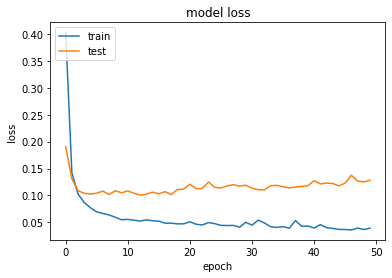

In [66]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

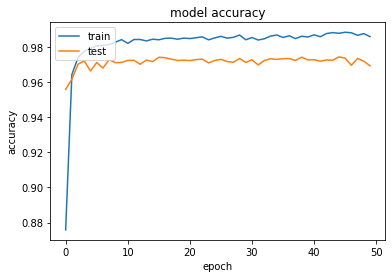

In [67]:
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Comparing and Evaluating

In [69]:
# comparing Dense vs LSTM

print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, y_test)} " )
print()
print(f"LSTM architecture loss and accuracy: {model1.evaluate(testing_padded, y_test)} " )

35/35 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9839
Dense architecture loss and accuracy: [0.06922850757837296, 0.9838564991950989] 

35/35 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9691
LSTM architecture loss and accuracy: [0.12824715673923492, 0.9691479802131653] 


Dense has outperformed LSTM. So we will choose Dense architecture as a final model for classifying the text messages for spam or ham.

In [70]:
# defining prediction function

def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))

In [79]:
predict_msg = ["You have received 3 Bitcoins in your account. Register to accept the transfer.",
               "How are you? What are you doing?",
               "When did your brother arrive?",
               "You have still not claimed the compensation you are due for the accident you had. To start the process please reply YES."]

predict_spam(predict_msg)

array([[0.60508627],
       [0.0208918 ],
       [0.00103847],
       [0.94386524]], dtype=float32)

Messages with higher probability value shows high chance of being a spam.